# Training a neural net with Keras (reduced dset split)

**Imports**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import pickle

tf.__version__
keras.__version__

'2.5.0'

**Build model Func**

In [2]:
def build_model(in_shape=(750,), l1_units=200, l2_units=200, dropout=0.2, loss = 'binary_crossentropy'):
    """Builds a 2 layer neural network for binary classification with tf.keras.
    """
    # Build model
    model = keras.models.Sequential([
        keras.layers.Dense(units=l1_units, input_shape=in_shape, activation='relu'),
        keras.layers.Dropout(rate=dropout),
        keras.layers.Dense(units=l2_units, activation='relu'),
        keras.layers.Dropout(rate=dropout),
        keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile model
    model.compile(optimizer = 'rmsprop', 
                  loss = loss, 
                  metrics = ['accuracy'])
    return model

# Reduced Dataset (subsetted dives)

## 9-fold cross-validation

**Import data**

In [57]:
data = pd.read_csv('../Data/Reduced/reduced_dset_wnames.csv')
data = data.drop(columns=['BirdID']).to_numpy()

**Train models**

In [58]:
# initialise empty dicts
metrics_rand = {}
histories_rand = {}

for x in range(1, 10):
    # fit 9 models with different randomly selected 20% training sets and average accuracy accross
    
    print(f'\nPROCESSING SAMPLE {x}/9...\n')
    
    print('Splitting into train/test...')
    msk = np.random.rand(len(data)) < 0.8
    train = data[msk]
    test = data[~msk]

    # train
    train_x = train[:,:-1]
    train_y = train[:,-1]

    # test
    test_x = test[:,:-1]
    test_y = test[:,-1]

    print(f'\nTrain shape: {train.shape}')
    print(f'Test shape: {test.shape}')
    print(f'Total dataset shape: {data.shape}')
    print(f'Total dives: {sum(data[:,-1] == 1)}')
    print(f'Total non-dives: {sum(data[:,-1] == 0)}\n')
    
    # Build model
    model = build_model(in_shape=train_x[0].shape)
    
    # Train model
    print('Fitting model...')
    history = model.fit(train_x, train_y, epochs=50)
    
    histories_rand[x] = pd.DataFrame(history.history)
    
    # Evaluate model
    print('\n')
    mets = model.evaluate(test_x, test_y)
    
    metrics_rand[x] = mets


PROCESSING SAMPLE 1/9...

Splitting into train/test...

Train shape: (17052, 751)
Test shape: (4196, 751)
Total dataset shape: (21248, 751)
Total dives: 9990
Total non-dives: 11258

Fitting model...
Epoch 1/50
533/533 [==============================] - 6s 7ms/step - loss: 0.1939 - accuracy: 0.9300
Epoch 2/50
533/533 [==============================] - 4s 8ms/step - loss: 0.0963 - accuracy: 0.9684
Epoch 3/50
533/533 [==============================] - 4s 7ms/step - loss: 0.0623 - accuracy: 0.9780
Epoch 4/50
533/533 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9835
Epoch 5/50
533/533 [==============================] - 4s 7ms/step - loss: 0.0462 - accuracy: 0.9869
Epoch 6/50
533/533 [==============================] - 3s 6ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 7/50
533/533 [==============================] - 3s 6ms/step - loss: 0.0298 - accuracy: 0.9911
Epoch 8/50
533/533 [==============================] - 4s 7ms/step - loss: 0.0315 - accuracy: 0.9914


532/532 [==============================] - 3s 5ms/step - loss: 0.0920 - accuracy: 0.9714
Epoch 3/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0675 - accuracy: 0.9782
Epoch 4/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0475 - accuracy: 0.9841
Epoch 5/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 6/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0345 - accuracy: 0.9898
Epoch 7/50
532/532 [==============================] - 3s 5ms/step - loss: 0.0318 - accuracy: 0.9904
Epoch 8/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0283 - accuracy: 0.9924
Epoch 9/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 10/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0245 - accuracy: 0.9931
Epoch 11/50
532/532 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 12/

534/534 [==============================] - 3s 6ms/step - loss: 0.0393 - accuracy: 0.9873
Epoch 6/50
534/534 [==============================] - 3s 6ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 7/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 8/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 9/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0233 - accuracy: 0.9933
Epoch 10/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0242 - accuracy: 0.9937
Epoch 11/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 12/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0209 - accuracy: 0.9948
Epoch 13/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0197 - accuracy: 0.9947
Epoch 14/50
534/534 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9959
Epoch 

**Plot accuracies**

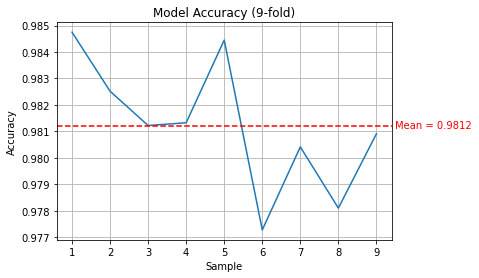

In [35]:
# Load stats to df
stats_rand = pd.DataFrame.from_dict(metrics_rand, orient='index', columns=['Loss', 'Accuracy'])

mn = stats_rand['Accuracy'].mean()

# Plot accuracy
acc = stats_rand.drop(columns=['Loss'])
plt_rand = plt.figure()
plt.plot(acc)
plt.axhline(y = mn, color = 'r', linestyle = '--')
plt.grid(True)
plt.text(len(acc)+0.5, mn, f'Mean = {np.round(mn, 4)}', 
         ha='left', va='center', color = 'r')
plt.xlabel("Sample")
plt.ylabel("Accuracy")
plt.title('Model Accuracy (9-fold)')
plt.show()

## Leave-one-out cross-validation

**Load data:**

In [12]:
data = pd.read_csv('../Data/Reduced/reduced_dset_wnames.csv')
birds = set(data['BirdID'])

If larger dset:

**Cross-validate**

In [7]:
histories_bird = {}
metrics_bird = {}

for no, bird in enumerate(birds, 1):
    
    print(f"\nWITHHOLDING BIRD {no}: '{bird}'\n")
    
    # Create dta
    print('Creating data...\n')
    test = data[data['BirdID'] == bird]
    train = data[data['BirdID'] != bird]
    
    # Split data
    train_x = train.drop(columns=['Dive', 'BirdID'])
    train_y = train['Dive']
    test_x = test.drop(columns=['Dive', 'BirdID'])
    test_y = test['Dive']
    
    # Build model
    model = build_model(in_shape=train_x.iloc[0].shape)
    
    # Train model
    print('Fitting model...')
    history = model.fit(train_x, train_y, epochs=50, batch_size = 64)
    
    # Saving model and stats
    histories_bird[bird] = pd.DataFrame(history.history)
    
    # Evaluate model
    print('\n')
    mets = model.evaluate(test_x, test_y)
    metrics_bird[bird] = mets
    


WITHHOLDING BIRD 1: 'ch_gps16_S1'

Creating data...

Fitting model...
2434/2434 [==============================] - 30s 12ms/step - loss: 0.1209 - accuracy: 0.9599


3319/3319 [==============================] - 7s 2ms/step - loss: 0.0644 - accuracy: 0.9802

WITHHOLDING BIRD 2: 'ch_gps12_S1'

Creating data...

Fitting model...
2607/2607 [==============================] - 51s 18ms/step - loss: 0.1130 - accuracy: 0.9622


1935/1935 [==============================] - 4s 2ms/step - loss: 0.8350 - accuracy: 0.8234

WITHHOLDING BIRD 3: 'ch_gps08_S1'

Creating data...

Fitting model...
2373/2373 [==============================] - 44s 18ms/step - loss: 0.1151 - accuracy: 0.9617


3805/3805 [==============================] - 8s 2ms/step - loss: 0.1315 - accuracy: 0.9626

WITHHOLDING BIRD 4: 'ch_gps07_gv37846_20190206_S1'

Creating data...

Fitting model...
2771/2771 [==============================] - 44s 15ms/step - loss: 0.1167 - accuracy: 0.9613


626/626 [==============================] - 2s 

**Plot accuracies:**

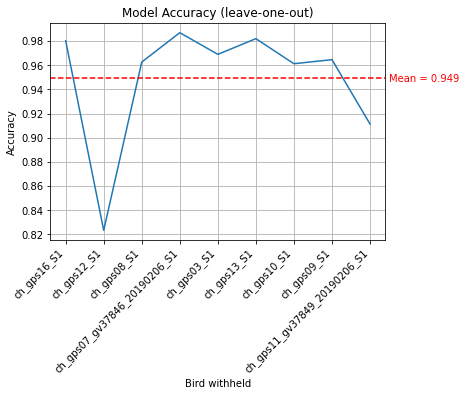

In [8]:
# Load stats to df
stats_bird = pd.DataFrame.from_dict(metrics_bird, orient='index', columns=['Loss', 'Accuracy'])

mn = stats_bird['Accuracy'].mean()

# Plot accuracy
acc = stats_bird.drop(columns=['Loss'])
plt_bird = plt.figure()
plt.plot(acc)
plt.axhline(y = mn, color = 'r', linestyle = '--')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.text(len(acc)-0.5, mn, f'Mean = {np.round(mn, 4)}', 
         ha='left', va='center', color = 'r')
plt.xlabel("Bird withheld")
plt.ylabel("Accuracy")
plt.title('Model Accuracy (leave-one-out)')
plt.show()

**Plot histories:**

In [233]:
#for bird, his in histories.items():
#    pd.DataFrame(his.history).plot(figsize=(8,5))
#    plt.grid(True)
#    plt.xlabel('epoch')
#    plt.title(f'Withheld bird: {bird}')
#    plt.show()

**Pickle dump stats**

In [27]:
# create dict to pickle
stats = {'rand': {'hist': histories_rand,
                  'perf': stats_rand,
                  'plot': plt_rand,
                  'mean': stats_rand.mean()
                 }, 
         'bird': {'hist': histories_bird, 
                  'perf': stats_bird,
                  'plot': plt_bird,
                  'mean': stats_bird.mean()
                 }
        }

# save
pickle.dump(stats, open("../Data/Reduced/Keras_bird_vs_rand_stats.p", "wb" ))

**Pickle load stats**

In [29]:
import pickle
stats = pickle.load(open("../Data/Reduced/Keras_bird_vs_rand_stats.p", "rb" ))

# Larger Dset (LOO)

In [31]:
data['BirdID'] = data['BirdID'].astype(str)
data['Dive'] = data['Dive'].astype(int)
data.to_csv('../Data/Reduced/reduced_all_dives.csv', header=True, index=False)

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import pickle

data = pd.read_csv('../Data/Reduced/reduced_all_dives.csv')
# Delete this cell once you have a rectified dset (i.e. no duplicated headers)
data = data[~(data['Dive'] == 'Dive')]
data['BirdID'] = data['BirdID'].astype(str)
data['Dive'] = data['Dive'].astype(int)
birds = set(data['BirdID'])


histories_bird = {}
metrics_bird = {}
conf = {}

for no, bird in enumerate(birds, 1):
    
    print(f"\nWITHHOLDING BIRD {no}: '{bird}'\n")
    
    # Create dta
    print('Creating data...\n')
    test = data[data['BirdID'] == bird]
    train = data[data['BirdID'] != bird]
    
    # Split data
    train_x = train.drop(columns=['Dive', 'BirdID'])
    train_y = train['Dive']
    test_x = test.drop(columns=['Dive', 'BirdID'])
    test_y = test['Dive']
    
    # Build model
    model = build_model(in_shape=train_x.iloc[0].shape)
    
    # Train model
    print('Fitting model...')
    history = model.fit(train_x, train_y, epochs=50, batch_size = 64)
    
    # Saving model and stats
    model.save(f'../Data/Reduced/Keras_ACC_XVal_Models/{bird}_model.h5')
    histories_bird[bird] = pd.DataFrame(history.history)
    
    # Evaluate model
    print('\n')
    mets = model.evaluate(test_x, test_y)
    metrics_bird[bird] = mets
    
    # Save confusion matrix
    pred_y = model.predict(test_x)
    pred_y =(pred_y>0.5)
    cm = confusion_matrix(test_y, pred_y)
    conf[bird] = cm

/Users/lukeswaby-petts/Desktop/CMEE/PROJECT/Code/dl_venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (751) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



WITHHOLDING BIRD 1: 'ch_gps16_S1'

Creating data...

Fitting model...
Epoch 1/50
9734/9734 [==============================] - 67s 7ms/step - loss: 0.1150 - accuracy: 0.9646
Epoch 2/50
9734/9734 [==============================] - 54s 6ms/step - loss: 0.0901 - accuracy: 0.9752
Epoch 3/50
9734/9734 [==============================] - 60s 6ms/step - loss: 0.0856 - accuracy: 0.9771
Epoch 4/50
9734/9734 [==============================] - 63s 6ms/step - loss: 0.0829 - accuracy: 0.9785
Epoch 5/50
9734/9734 [==============================] - 62s 6ms/step - loss: 0.0814 - accuracy: 0.9789
Epoch 6/50
9734/9734 [==============================] - 61s 6ms/step - loss: 0.0808 - accuracy: 0.9796
Epoch 7/50
9734/9734 [==============================] - 61s 6ms/step - loss: 0.0806 - accuracy: 0.9798
Epoch 8/50
9734/9734 [==============================] - 60s 6ms/step - loss: 0.0800 - accuracy: 0.9801
Epoch 9/50
9734/9734 [==============================] - 57s 6ms/step - loss: 0.0787 - accuracy: 0.9806
Ep

11081/11081 [==============================] - 70s 6ms/step - loss: 0.1119 - accuracy: 0.9657
Epoch 2/50
11081/11081 [==============================] - 57s 5ms/step - loss: 0.0886 - accuracy: 0.9759
Epoch 3/50
11081/11081 [==============================] - 55s 5ms/step - loss: 0.0837 - accuracy: 0.9777
Epoch 4/50
11081/11081 [==============================] - 55s 5ms/step - loss: 0.0808 - accuracy: 0.9786
Epoch 5/50
11081/11081 [==============================] - 60s 5ms/step - loss: 0.0798 - accuracy: 0.9793
Epoch 6/50
11081/11081 [==============================] - 64s 6ms/step - loss: 0.0781 - accuracy: 0.9801
Epoch 7/50
11081/11081 [==============================] - 63s 6ms/step - loss: 0.0772 - accuracy: 0.9801
Epoch 8/50
11081/11081 [==============================] - 62s 6ms/step - loss: 0.0775 - accuracy: 0.9806
Epoch 9/50
11081/11081 [==============================] - 63s 6ms/step - loss: 0.0756 - accuracy: 0.9812
Epoch 10/50
11081/11081 [==============================] - 64s 6ms

10404/10404 [==============================] - 61s 6ms/step - loss: 0.0877 - accuracy: 0.9758
Epoch 3/50
10404/10404 [==============================] - 55s 5ms/step - loss: 0.0826 - accuracy: 0.9777
Epoch 4/50
10404/10404 [==============================] - 52s 5ms/step - loss: 0.0797 - accuracy: 0.9789
Epoch 5/50
10404/10404 [==============================] - 52s 5ms/step - loss: 0.0780 - accuracy: 0.9796
Epoch 6/50
10404/10404 [==============================] - 54s 5ms/step - loss: 0.0762 - accuracy: 0.9803
Epoch 7/50
10404/10404 [==============================] - 52s 5ms/step - loss: 0.0760 - accuracy: 0.9806
Epoch 8/50
10404/10404 [==============================] - 52s 5ms/step - loss: 0.0751 - accuracy: 0.9808
Epoch 9/50
10404/10404 [==============================] - 53s 5ms/step - loss: 0.0746 - accuracy: 0.9811
Epoch 10/50
10404/10404 [==============================] - 51s 5ms/step - loss: 0.0743 - accuracy: 0.9813
Epoch 11/50
10404/10404 [==============================] - 51s 5m

10363/10363 [==============================] - 51s 5ms/step - loss: 0.0737 - accuracy: 0.9833
Epoch 29/50
10363/10363 [==============================] - 53s 5ms/step - loss: 0.0738 - accuracy: 0.9833
Epoch 30/50
10363/10363 [==============================] - 51s 5ms/step - loss: 0.0727 - accuracy: 0.9840
Epoch 31/50
10363/10363 [==============================] - 50s 5ms/step - loss: 0.0713 - accuracy: 0.9839
Epoch 32/50
10363/10363 [==============================] - 55s 5ms/step - loss: 0.0715 - accuracy: 0.9840
Epoch 33/50
10363/10363 [==============================] - 62s 6ms/step - loss: 0.0723 - accuracy: 0.9841
Epoch 34/50
10363/10363 [==============================] - 61s 6ms/step - loss: 0.0732 - accuracy: 0.9840
Epoch 35/50
10363/10363 [==============================] - 62s 6ms/step - loss: 0.0711 - accuracy: 0.9842
Epoch 36/50
10363/10363 [==============================] - 61s 6ms/step - loss: 0.0724 - accuracy: 0.9841
Epoch 37/50
10363/10363 [==============================] -

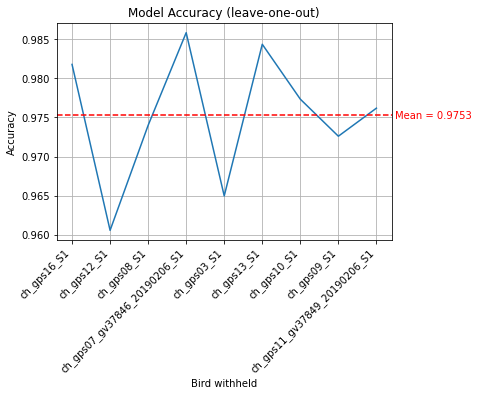

In [11]:
# Load stats to df
stats_bird = pd.DataFrame.from_dict(metrics_bird, orient='index', columns=['Loss', 'Accuracy'])

mn = stats_bird['Accuracy'].mean()

# Plot accuracy
acc = stats_bird.drop(columns=['Loss'])
plt_bird = plt.figure()
plt.plot(acc)
plt.axhline(y = mn, color = 'r', linestyle = '--')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.text(len(acc)-0.5, mn, f'Mean = {np.round(mn, 4)}', 
         ha='left', va='center', color = 'r')
plt.xlabel("Bird withheld")
plt.ylabel("Accuracy")
plt.title('Model Accuracy (leave-one-out)')
plt.show()

**Average Percentage Confusion Matrix**

In [ ]:
perc = []
for arr in conf.values():
    N = np.sum(arr)
    arr2 = np.round((arr/N)*100, 2)
    perc.append(arr2)
    
perc_conf = np.round(sum(perc)/len(perc), 2)

**Pickle Dump**

In [26]:
# create dict to pickle
bigger_stats = {'hist': histories_bird,
                'perf': stats_bird,
                'plot': plt_bird,
                'mean': stats_bird.mean(),
                'conf': conf,
                'perc_conf': perc_conf
               }

# save
pickle.dump(bigger_stats, open("../Data/Reduced/reduced_LOO_all_dives_stats.p", "wb" ))

**Load**

In [73]:
import pickle
stats = pickle.load(open("../Data/Reduced/reduced_LOO_all_dives_stats.p", "rb" ))

# ROC curve stuff

Load data:

In [ ]:
train = pd.read_csv('../Data/Reduced/train_reduced_dset.csv').to_numpy()
test = pd.read_csv('../Data/Reduced/test_reduced_dset.csv').to_numpy()

# train
train_x = train[:,:-1]
train_y = train[:,-1]

# test
test_x = test[:,:-1]
test_y = test[:,-1]

print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
print(f'Total dataset shape: {(train.shape[0] + test.shape[0], train.shape[1])}')
print(f'Total dives: {sum(np.vstack((train, test))[:,-1] == 1)}')
print(f'Total non-dives: {sum(np.vstack((train, test))[:,-1] == 0)}')

Models:

In [ ]:
y_pred = model.predict(test_x, batch_size=128)

# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_pred)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='NN')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()

# Calculate optimal threshold
gmeans = np.sqrt(tpr * (1-fpr))  # calculate the g-mean for each threshold
ix = np.argmax(gmeans)
threshold = thresholds[ix]

print(f'\nOptimal threshold: {threshold}')

print('\nConfusion Matrix:')
Y_pred = [1 * (x[0]>=threshold) for x in y_pred]
conf = confusion_matrix(test_y, Y_pred)
print(conf)

print(f'\nErrors: {conf[0,1]+conf[1,0]}')